<a href="https://colab.research.google.com/github/Rayyaan23/Temp_prediction_analysis/blob/main/Temperature_prediction_Intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: import keras

!pip install tensorflow

import keras


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('humidity.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701548 entries, 0 to 701547
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    701548 non-null  int64  
 1   lat          701548 non-null  float64
 2   lon          701548 non-null  float64
 3   pressure     701548 non-null  float64
 4   temperature  701548 non-null  float64
 5   humidity     701548 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 32.1 MB


,sensor_id,lat,lon,pressure,temperature,humidity
0,2266,42.738,23.272,95270.27,23.46,62.48
1,2292,42.663,23.273,94355.83,23.06,59.46
2,3096,42.700,23.360,95155.81,26.53,44.38
3,3428,42.624,23.406,94679.57,28.34,38.28
4,3472,42.669,23.318,94327.88,26.31,46.37


In [ ]:
# prompt: check for missing values

df.isnull().sum()

,0
sensor_id,0
lat,0
lon,0
pressure,0
temperature,0
humidity,0


In [ ]:
# prompt: display summary statistics

df.describe()

,sensor_id,lat,lon,pressure,temperature,humidity
count,701548.000000,701548.000000,701548.000000,701548.000000,701548.000000,701548.000000
mean,2835.419842,42.679722,23.333739,94965.292500,24.754990,48.348949
std,798.018890,0.025568,0.039365,2577.210945,14.013001,20.907247
min,1764.000000,42.622000,23.240000,0.000000,-145.120000,0.000000
25%,2224.000000,42.665000,23.310000,94528.017500,20.630000,34.140000
50%,2323.000000,42.685000,23.332000,95005.480000,24.780000,48.350000
75%,3474.000000,42.694000,23.360000,95405.132500,29.870000,62.940000
max,4661.000000,42.738000,23.419000,164926.750000,61.170000,100.000000


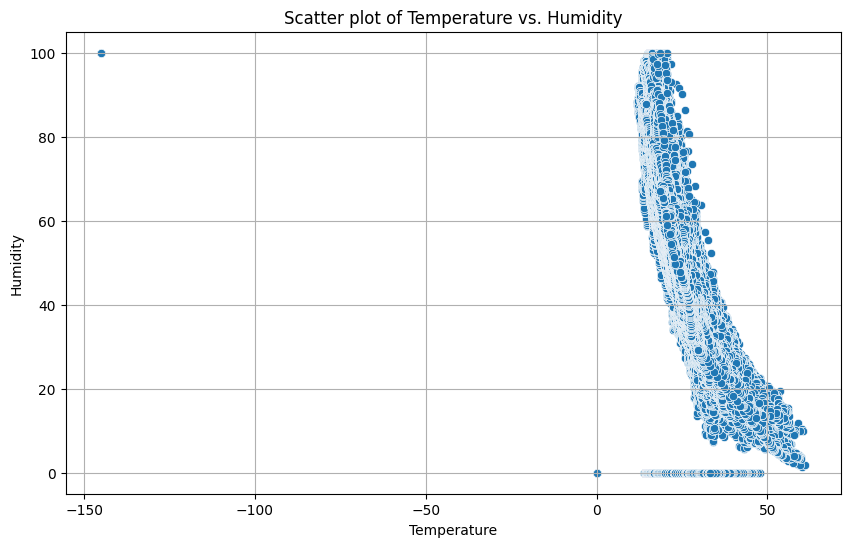

In [ ]:
# prompt: Scatter plot to observe relationship

plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='humidity', data=df)
plt.title('Scatter plot of Temperature vs. Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.grid(True)
plt.show()

In [ ]:
# prompt: drop any row with missing values

df_cleaned = df.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701548 entries, 0 to 701547
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    701548 non-null  int64  
 1   lat          701548 non-null  float64
 2   lon          701548 non-null  float64
 3   pressure     701548 non-null  float64
 4   temperature  701548 non-null  float64
 5   humidity     701548 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 32.1 MB


In [ ]:
# prompt: define features and target

features = ['temperature']
target = 'humidity'

X = df_cleaned[features]
y = df_cleaned[target]


In [ ]:
# prompt: train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (561238, 1)
Shape of X_test: (140310, 1)
Shape of y_train: (561238,)
Shape of y_test: (140310,)


Mean Squared Error: 326.18
R-squared: 0.26


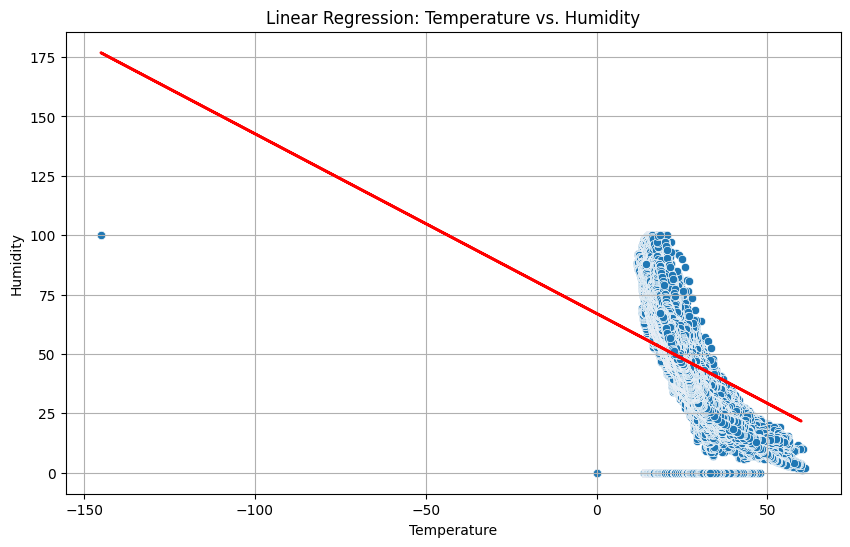

Coefficient (Slope): -0.7563883933919084
Intercept: 67.06471123177113


In [ ]:
# prompt: linear regression

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='humidity', data=df_cleaned)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Linear Regression: Temperature vs. Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.grid(True)
plt.show()

# Print the coefficients
print("Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)

In [ ]:
# prompt: predict the model

# You can use the trained model to make predictions on new data
# For example, let's predict the humidity for a temperature of 25 degrees
new_temperature = np.array([[25]])
predicted_humidity = model.predict(new_temperature)
print(f"Predicted humidity for temperature 25: {predicted_humidity[0]:.2f}")

# You can also predict for multiple new temperatures
new_temperatures = np.array([[20], [30], [35]])
predicted_humidities = model.predict(new_temperatures)
print("Predicted humidities for new temperatures:")
for temp, hum in zip(new_temperatures.flatten(), predicted_humidities):
  print(f"Temperature: {temp}, Predicted Humidity: {hum:.2f}")

Predicted humidity for temperature 25: 48.16
Predicted humidities for new temperatures:
Temperature: 20, Predicted Humidity: 51.94
Temperature: 30, Predicted Humidity: 44.37
Temperature: 35, Predicted Humidity: 40.59


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Mean Squared Error: 326.18
R-squared: 0.26


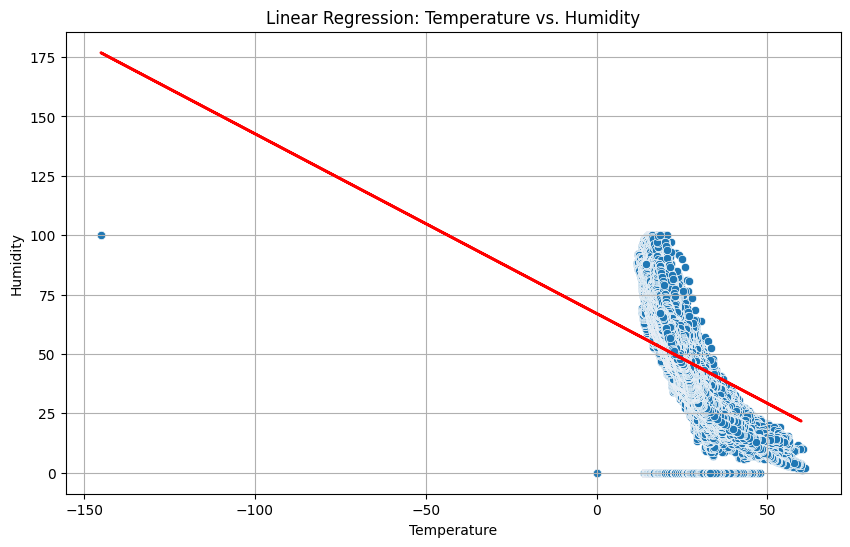

Coefficient (Slope): -0.7563883933919084
Intercept: 67.06471123177113
Predicted humidity for temperature 25: 48.16
Predicted humidities for new temperatures:
Temperature: 20, Predicted Humidity: 51.94
Temperature: 30, Predicted Humidity: 44.37
Temperature: 35, Predicted Humidity: 40.59


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# prompt: evaluate the model performance

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='humidity', data=df_cleaned)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Linear Regression: Temperature vs. Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.grid(True)
plt.show()

# Print the coefficients
print("Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)

# You can use the trained model to make predictions on new data
# For example, let's predict the humidity for a temperature of 25 degrees
new_temperature = np.array([[25]])
predicted_humidity = model.predict(new_temperature)
print(f"Predicted humidity for temperature 25: {predicted_humidity[0]:.2f}")

# You can also predict for multiple new temperatures
new_temperatures = np.array([[20], [30], [35]])
predicted_humidities = model.predict(new_temperatures)
print("Predicted humidities for new temperatures:")
for temp, hum in zip(new_temperatures.flatten(), predicted_humidities):
  print(f"Temperature: {temp}, Predicted Humidity: {hum:.2f}")